In [28]:
import pandas as pd 
df = pd.read_csv('C:/Users/mi-bi/OneDrive/바탕 화면/data Row/mom.csv',index_col=0)
df.head(1)

,날짜,종가,시가,최고가,최저가,누적거래량,누적거래대금,종목명,5_mom,10_mom,20_mom
0,2022-12-22,10650,9980,11700,9930,28856232,309808795730,바이오노트,NaN,NaN,NaN


In [29]:
df = df.drop(['5_mom','10_mom','20_mom'],axis=1)

In [17]:
codes_kospi = pd.read_csv('SRC\current_kospi_codes.csv')
codes_kosdaq = pd.read_csv('SRC\current_kosdaq_codes.csv')

In [22]:
codes = pd.concat([codes_kospi,codes_kosdaq])

In [23]:
codes = codes.rename(columns={'회사명':'종목명'})


In [30]:
df = df.merge(codes, on='종목명', how='inner')


In [31]:
df.isnull().sum()

날짜        0
종가        0
시가        0
최고가       0
최저가       0
누적거래량     0
누적거래대금    0
종목명       0
종목코드      0
상장일       0
dtype: int64

In [33]:
df.head(1)

,날짜,종가,시가,최고가,최저가,누적거래량,누적거래대금,종목명,종목코드,상장일
0,2022-12-22,10650,9980,11700,9930,28856232,309808795730,바이오노트,377740,2022-12-22


<마크미너비니 추세추종>  
*선택 : EPS증가율 : 최근 분기실적 전분기대비 증감률 10% 이상  
이동평균비교 : [일] 0 봉전 (종가 50) 이평 <종가>  
주가이평배열 (3) : [일] 0 봉전 200이평 < 150이평 <50이평  
52주 최저가대비 30%이상  
52주 최고가대비 -25%이상  

주가평균 5, 50, 150, 200  
52주 최저가 , 52주 최고가  

#### 이평선

In [37]:
def make_ma(df):
    object_list = df['종목명'].unique()
    for i in object_list:
        idx = df[df['종목명']==i].index
        df.loc[idx[0]:idx[-1], '5_ma'] = df.loc[idx[0]:idx[-1],'종가'].rolling(5).mean()
        df.loc[idx[0]:idx[-1], '50_ma'] = df.loc[idx[0]:idx[-1],'종가'].rolling(50).mean()
        df.loc[idx[0]:idx[-1], '150_ma'] = df.loc[idx[0]:idx[-1],'종가'].rolling(150).mean()
        df.loc[idx[0]:idx[-1], '200_ma'] = df.loc[idx[0]:idx[-1],'종가'].rolling(200).mean()
    return df

In [38]:
df = make_ma(df)

In [48]:
def data_reduce(df):
    df['5_ma'] = df['5_ma'].apply(lambda x: round(x,3))
    df['50_ma'] = df['50_ma'].apply(lambda x: round(x,3))
    df['150_ma'] = df['150_ma'].apply(lambda x: round(x,3))
    df['200_ma'] = df['200_ma'].apply(lambda x: round(x,3))
    return df

In [52]:
'''df = data_reduce(df) # 의미는 없네영'''

'df = data_reduce(df) # 의미는 없네영'

#### 52주신고가, 신저가

In [75]:
def new_price_52(df):
    object_list = df['종목명'].unique()
    for i in object_list:
        idx = df[df['종목명']==i].index
        df.loc[idx[0]:idx[-1], '52_high'] = df.loc[idx[0]:idx[-1],'최고가'].rolling(250).max()
        df.loc[idx[0]:idx[-1], '52_low'] = df.loc[idx[0]:idx[-1],'최저가'].rolling(250).min() 
        
    return df

<마크미너비니 추세추종>  
*선택 : EPS증가율 : 최근 분기실적 전분기대비 증감률 10% 이상  
이동평균비교 : [일] 0 봉전 (종가 50) 이평 <종가>  
주가이평배열 (3) : [일] 0 봉전 200이평 < 150이평 <50이평  
52주 최저가대비 30%이상  
52주 최고가대비 -25%이상  

In [96]:
import numpy as np

In [99]:
con1 = df['종가']>df['50_ma']
con2 = (df['200_ma']<df['150_ma'])&(df['150_ma']<df['50_ma'])
con3 = df['종가'] >= df['52_low']+(df['52_low']*0.3)
con4 = df['종가'] <= df['52_high']-(df['52_high']*0.25)

df['signal_1'] = np.where(con1&con2&con3&con4,True,False)

In [105]:
df[df['종목명']=='현대에너지솔루션'].tail(50)

,날짜,종가,시가,최고가,최저가,누적거래량,누적거래대금,종목명,종목코드,상장일,5_ma,50_ma,150_ma,200_ma,52_high,52_low,signal_1
21444,2022-10-21,56800,57400,58200,55600,131880,7476315500,현대에너지솔루션,322000,2019-11-19,58020.0,63512.0,40725.333,36184.75,86200.0,18300.0,False
21445,2022-10-24,59500,58400,63100,58400,700107,42674005100,현대에너지솔루션,322000,2019-11-19,58620.0,63530.0,40968.000,36380.25,86200.0,18300.0,False
21446,2022-10-25,55800,61800,62600,55400,819700,47602762000,현대에너지솔루션,322000,2019-11-19,57980.0,63590.0,41183.333,36555.75,86200.0,18300.0,False
21447,2022-10-26,55800,57100,57900,55700,341457,19432316500,현대에너지솔루션,322000,2019-11-19,57060.0,63620.0,41397.667,36727.75,86200.0,18300.0,False
21448,2022-10-27,58800,57800,59000,56500,564801,32759126400,현대에너지솔루션,322000,2019-11-19,57340.0,63658.0,41636.000,36915.75,86200.0,18300.0,False
21449,2022-10-28,56200,58400,58400,55800,319576,18103693300,현대에너지솔루션,322000,2019-11-19,57220.0,63672.0,41854.667,37091.25,86200.0,18300.0,False
21450,2022-10-31,58900,57500,59000,57500,386674,22549268200,현대에너지솔루션,322000,2019-11-19,57100.0,63790.0,42093.333,37282.00,86200.0,18300.0,False
21451,2022-11-01,59300,59800,61400,58600,468500,28044165000,현대에너지솔루션,322000,2019-11-19,57800.0,63900.0,42336.333,37476.25,86200.0,18300.0,False
21452,2022-11-02,57600,59400,59900,57400,228413,13352497000,현대에너지솔루션,322000,2019-11-19,58160.0,63984.0,42568.333,37659.50,86200.0,18300.0,False
21453,2022-11-03,56900,56200,57500,56000,194256,11052509100,현대에너지솔루션,322000,2019-11-19,57780.0,64022.0,42797.333,37840.50,86200.0,18300.0,False


In [76]:
df = new_price_52(df)

<AxesSubplot: >

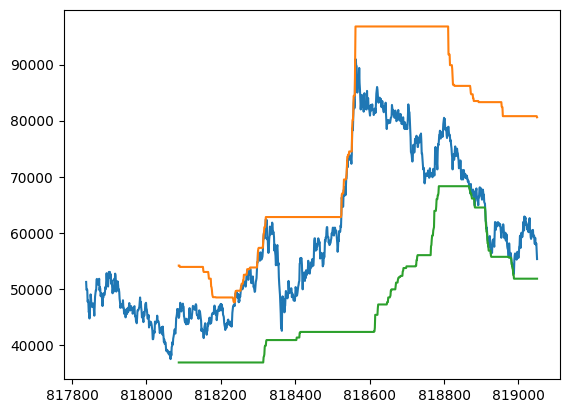

In [83]:
df[df['종목명']=='삼성전자']['종가'].plot()
df[df['종목명']=='삼성전자']['52_high'].plot()
df[df['종목명']=='삼성전자']['52_low'].plot()